<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice.png' width=300/></center>

# 데이터프레임 변경 (2)

1) 다음 요구사항에 맞게 순서대로 구문을 작성하고 확인하세요. 

- 1-1) pandas 라이브러리를 pd 별칭을 주어 불러오세요.
- 1-2) 다음 경로의 파일을 읽어와 titanic 데이터프레임을 선언하세요.
    - 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/titanic.csv'
- 1-3) PassengerId, Name,Ticket, Cabin 열을 한 번에 제거하세요.

In [12]:
# 1-1 #라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1-2 파일 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/titanic.csv'
titanic = pd.read_csv(path)

# 열 제거
del_cols = ['PassengerId','Name','Ticket','Cabin']

titanic = titanic.drop(columns = del_cols, axis = 1)

# 확인
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


2) 상위 5개 행을 확인하세요.

In [ ]:
titanic.head()

3) 다음 요구사항에 맞게 순서대로 구문을 작성하고 확인하세요. 

- 3-1) Age 열 결측치를 Age 열 평균으로 채우세요.
- 3-2) Embarked 열 결측치를 'S'로 채우세요.
- 3-3) 각 열에 결측치가 남아있는지 확인하세요.

In [13]:
titanic_test = titanic.copy()
mean_Age = titanic['Age'].mean()

titanic_test['Age'].fillna(mean_Age, inplace =True)

#3-2 done
titanic_test['Embarked'].fillna('S', inplace = True)

# 3-3 done
print(titanic_test.isna().sum())
titanic_test.info()


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


4) 다음 요구사항에 맞게 순서대로 구문을 작성하고 확인하세요. 

- 4-1) groupby 메소드를 사용해 Pclass 별 개수를 집계하여 tmp 데이터프레임으로 선언하세요.
- 4-2) tmp 데이터프레임 열 이름이 Pclass, Count가 되게 변경하세요.
- 4-3) tmp 데이터프레임을 막대 그래프로 시각화해 확인하세요.

In [21]:
tmp = titanic.groupby(by ='Pclass',as_index = False)['Survived'].count()
tmp


,Pclass,Survived
0,1,216
1,2,184
2,3,491


In [22]:
tmp.columns = ['Pclass', 'Count']


   Pclass  Count
0       1    216
1       2    184
2       3    491


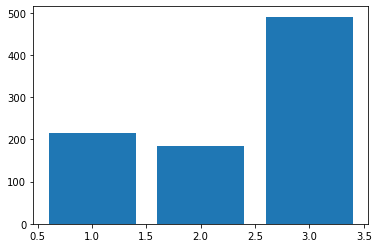

In [11]:
tmp = titanic_test.groupby(by = 'Pclass', as_index = False)[['Survived']].count()
titanic_test.head(10)

tmp.columns = ['Pclass', 'Count']

print(tmp)
#시각화

plt.bar(tmp['Pclass'],tmp['Count'])
plt.show()

5) Pclass, Sex, Embarked 열을 한 번에 가변수화하세요. 단, 다중공선성 문제가 없도록 범주값 개수보다 하나 적은 수의 열이 만들어지게 하세요.

In [23]:
cols = ['Pclass','Sex','Embarked']

titanic = pd.get_dummies(titanic , columns = cols, drop_first = True)

titanic

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,1,0,1,0,1
887,1,19.0,0,0,30.0000,0,0,0,0,1
888,0,NaN,1,2,23.4500,0,1,0,0,1
889,1,26.0,0,0,30.0000,0,0,1,0,0


In [5]:
# 대상열
cols = ['Pclass','Sex','Embarked']

# 가변수화
titanic = pd.get_dummies(titanic, columns = cols, drop_first = True)

# 확인
titanic.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,1,0,1,0,1
887,1,19.0,0,0,30.0000,0,0,0,0,1
888,0,NaN,1,2,23.4500,0,1,0,0,1
889,1,26.0,0,0,30.0000,0,0,1,0,0
